In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog

from sneakers_ml.features.features import save_features
from sneakers_ml.features.hog import get_hog_features

/home/seara/.cache/pypoetry/virtualenvs/sneakers-ml-hflTz_mY-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features, classes, class_to_idx = get_hog_features("data/merged/images/by-brands")

  0%|          | 0/5892 [00:00<?, ?it/s]

100%|██████████| 5892/5892 [24:50<00:00,  3.95it/s]


In [3]:
save_path = Path("data/features/by-brands/hog.pickle")
save_features(save_path, features, classes, class_to_idx)

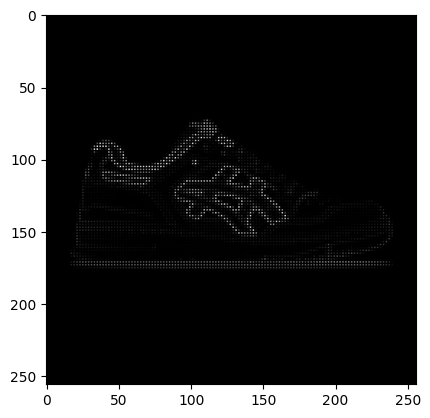

In [11]:
image = "data/merged/images/by-brands/asics/0.jpeg"

img = Image.open("data/merged/images/by-brands/asics/0.jpeg")
img = img.resize((256, 256))


width, height = img.size

left = (width - 224) / 2
top = (height - 224) / 2
right = (width + 224) / 2
bottom = (height + 224) / 2

im = img.crop((left, top, right, bottom))
img

fd, hog_image = hog(
    img, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, channel_axis=-1
)
plt.imshow(hog_image, cmap=plt.cm.gray)